In [61]:
%load_ext autoreload
%autoreload 2

if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.decomposition import PCA
import pickle
from sklearn.linear_model import LinearRegression
from aux_funcs import colored_line, compressed_read, logical_and, compressed_write, format_plot, add_pc_axes, format_pc_plot, make_path_if_not_exists
from nb_analysis_tools import load_hidden_and_behavior

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2.0

plt.rcParams['font.family'] = 'Helvetica Light'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
hidden, pc_activities, all_session_data, flattened_hidden, pca = load_hidden_and_behavior('../../results/rl_agent_outputs/acc_reward_test_he_005k_01_2025-02-11_13_11_05_501531_var_noise_0_activity_weight_0')

['00001.pkl', '00002.pkl', '00003.pkl', '00004.pkl', '00005.pkl', '00006.pkl', '00007.pkl']


In [22]:
env_idx = 0
session_data = all_session_data[env_idx]

Axes(0.125,0.11;0.775x0.77)


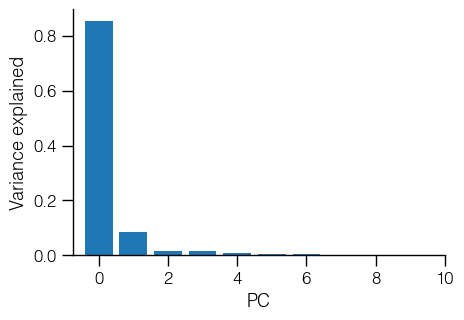

In [21]:
scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.bar(np.arange(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_)
axs.set_xlim(-0.75, 10)
axs.set_ylabel('Variance explained')
axs.set_xlabel('PC')
format_plot(axs)

Axes(0.424432,0.53;0.0528409x0.35)
Axes(0.847159,0.53;0.0528409x0.35)
Axes(0.424432,0.11;0.0528409x0.35)
Axes(0.847159,0.11;0.0528409x0.35)
[<Axes: > <Axes: > <Axes: > <Axes: >]
[<Axes: xlabel='PC 1', ylabel='PC 2'>, <Axes: xlabel='PC 3', ylabel='PC 4'>, <Axes: xlabel='PC 5', ylabel='PC 6'>, <Axes: xlabel='PC 7', ylabel='PC 8'>]


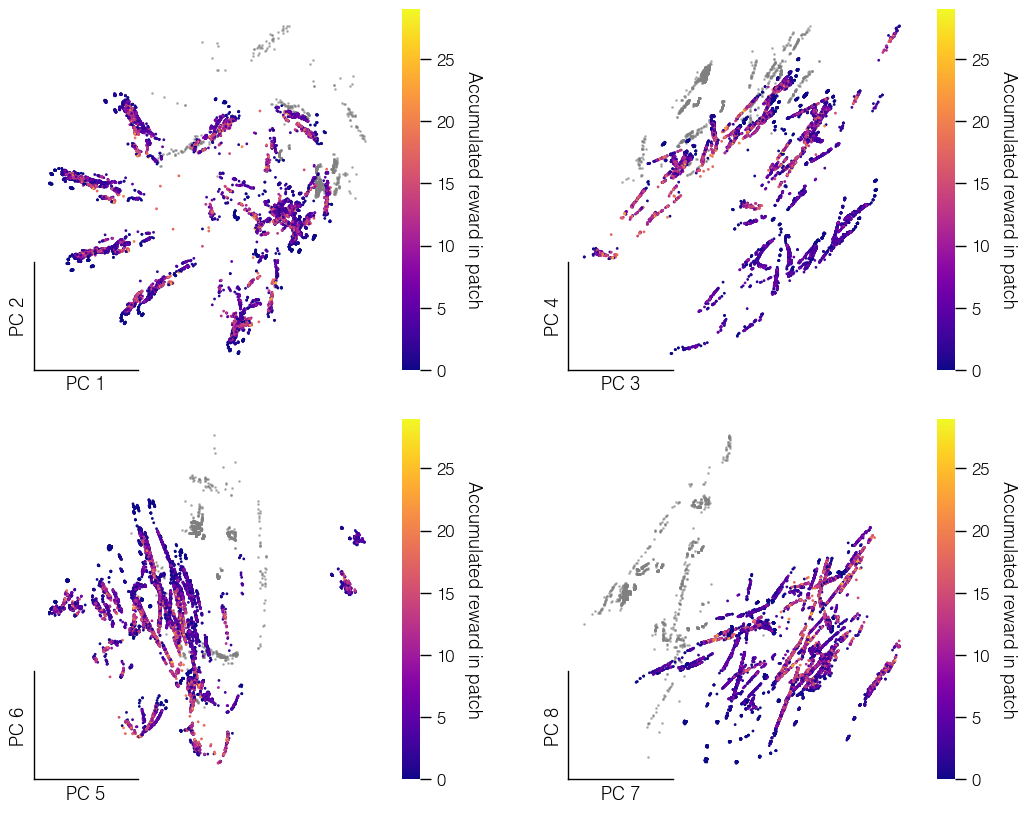

In [23]:
scale = 1.2
fig, axs = plt.subplots(2, 2, figsize=(9 * scale, 7 * scale))

for k in np.arange(0, 8, 2):
    k_x, k_y = int(k/4), int(k/2) % 2
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] <= 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] <= 0],
        s=1,
        c='grey',
        alpha=0.5,
        # vmax=2,
    )
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] > 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] > 0],
        s=1,
        c=session_data['rewards_seen_in_patch'][session_data['agent_in_patch'] > 0],
        cmap='plasma',
        vmin=0,
    )
    cbar_ax = fig.colorbar(cbar)
    format_plot(cbar_ax.ax, rightspine=False, leftspine=False, topspine=False, bottomspine=False)
    cbar_ax.outline.set_visible(False)
    cbar_ax.set_label('Accumulated reward in patch', rotation=270, labelpad=20)
fig.tight_layout()
# axs[0, 0].set_title('Activity colored by rewards seen in patch')
# fig.tight_layout()
format_pc_plot(axs)

Axes(0.424432,0.53;0.0528409x0.35)
Axes(0.847159,0.53;0.0528409x0.35)
Axes(0.424432,0.11;0.0528409x0.35)
Axes(0.847159,0.11;0.0528409x0.35)
[<Axes: > <Axes: > <Axes: > <Axes: >]
[<Axes: xlabel='PC 1', ylabel='PC 2'>, <Axes: xlabel='PC 3', ylabel='PC 4'>, <Axes: xlabel='PC 5', ylabel='PC 6'>, <Axes: xlabel='PC 7', ylabel='PC 8'>]


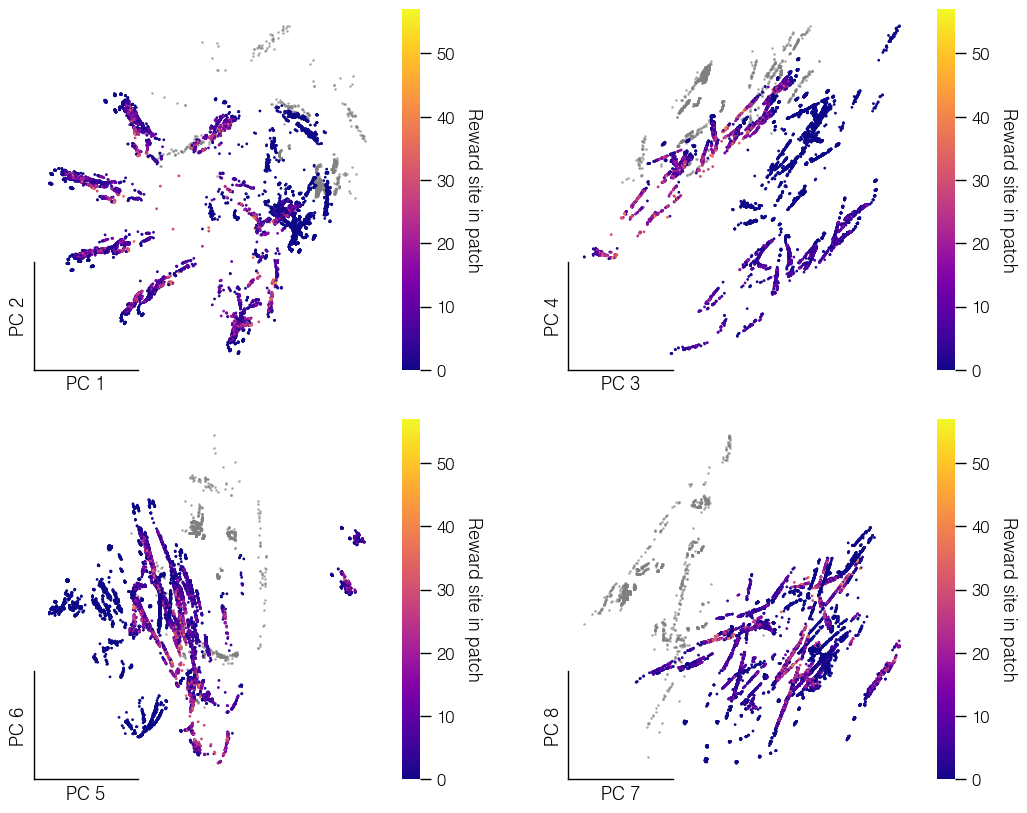

In [24]:
scale = 1.2
fig, axs = plt.subplots(2, 2, figsize=(9 * scale, 7 * scale))

for k in np.arange(0, 8, 2):
    k_x, k_y = int(k/4), int(k/2) % 2
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] <= 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] <= 0],
        s=1,
        c='grey',
        alpha=0.5,
        # vmax=2,
    )
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] > 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] > 0],
        s=1,
        c=session_data['reward_site_idx'][session_data['agent_in_patch'] > 0],
        cmap='plasma',
        vmin=0,
    )
    cbar_ax = fig.colorbar(cbar)
    format_plot(cbar_ax.ax, rightspine=False, leftspine=False, topspine=False, bottomspine=False)
    cbar_ax.outline.set_visible(False)
    cbar_ax.set_label('Reward site in patch', rotation=270, labelpad=20)
# axs[0, 0].set_title('Activity colored by rewards seen in patch')
fig.tight_layout()
format_pc_plot(axs)
# fig.tight_layout()

[<Axes: > <Axes: > <Axes: > <Axes: >]
[<Axes: xlabel='PC 1', ylabel='PC 2'>, <Axes: xlabel='PC 3', ylabel='PC 4'>, <Axes: xlabel='PC 5', ylabel='PC 6'>, <Axes: xlabel='PC 7', ylabel='PC 8'>]


C:\Users\david.bell\AppData\Local\Temp\ipykernel_3744\634952935.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('magma')


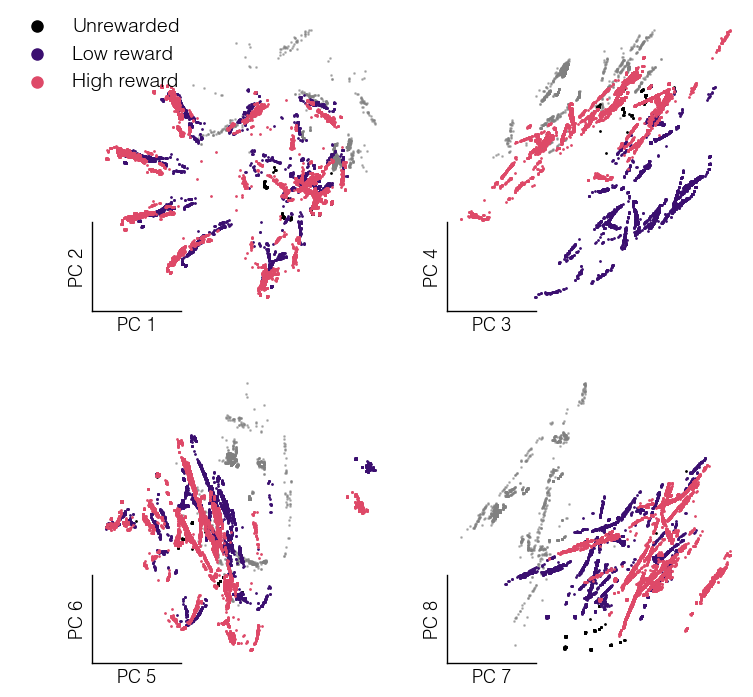

In [25]:
scale = 1.2
fig, axs = plt.subplots(2, 2, figsize=(7 * scale, 7 * scale))

for k in np.arange(0, 8, 2):
    k_x, k_y = int(k/4), int(k/2) % 2
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] <= 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] <= 0],
        s=1,
        c='grey',
        alpha=0.5,
        # vmax=2,
    )

    cmap = mpl.cm.get_cmap('magma')
    colors = ['black', cmap(10/50), cmap(30/50)]

    labels = [
        'Unrewarded',
        'Low reward',
        'High reward',
    ]
    
    for i in range(3):
        mask = logical_and(session_data['agent_in_patch'] > 0, session_data['current_patch_num'] == i)
        if k == 0:
            cbar = axs[k_x, k_y].scatter(
                pc_activities[k, env_idx, :][mask],
                pc_activities[k+1, env_idx, :][mask],
                s=1,
                color=colors[i],
                label=labels[i],
            )
        else:
            cbar = axs[k_x, k_y].scatter(
                pc_activities[k, env_idx, :][mask],
                pc_activities[k+1, env_idx, :][mask],
                s=1,
                color=colors[i],
            )
    # cbar_ax = fig.colorbar(cbar)
    # format_plot(cbar_ax.ax, rightspine=False, leftspine=False, topspine=False, bottomspine=False)
    # cbar_ax.outline.set_visible(False)
# axs[0, 0].set_title('Activity colored by rewards seen in patch')
legend = fig.legend(markerscale=8, bbox_to_anchor=(0.25, .9), fontsize=14, frameon=False)
# fig.tight_layout()
format_pc_plot(axs)

Axes(0.424432,0.53;0.0528409x0.35)
Axes(0.847159,0.53;0.0528409x0.35)
Axes(0.424432,0.11;0.0528409x0.35)
Axes(0.847159,0.11;0.0528409x0.35)
[<Axes: > <Axes: > <Axes: > <Axes: >]
[<Axes: xlabel='PC 1', ylabel='PC 2'>, <Axes: xlabel='PC 3', ylabel='PC 4'>, <Axes: xlabel='PC 5', ylabel='PC 6'>, <Axes: xlabel='PC 7', ylabel='PC 8'>]


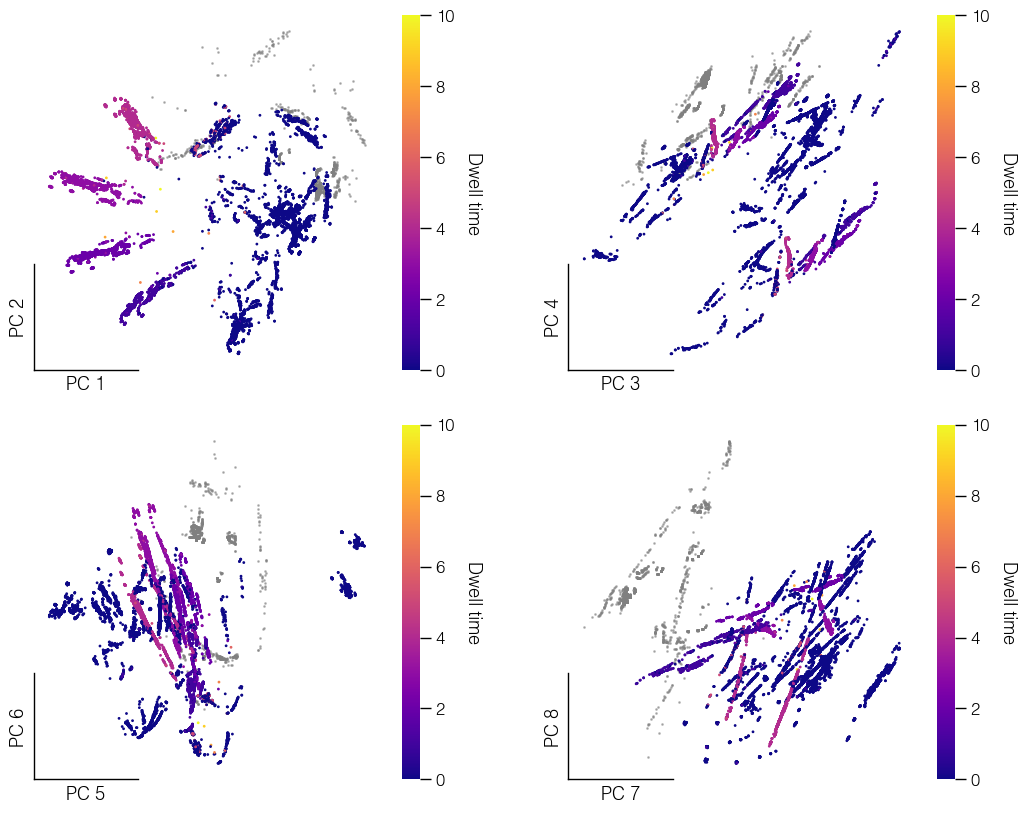

In [26]:
scale = 1.2
fig, axs = plt.subplots(2, 2, figsize=(9 * scale, 7 * scale))

for k in np.arange(0, 8, 2):
    k_x, k_y = int(k/4), int(k/2) % 2
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] <= 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] <= 0],
        s=1,
        c='grey',
        alpha=0.5,
        # vmax=2,
    )
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] > 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] > 0],
        s=1,
        c=session_data['dwell_time'][session_data['agent_in_patch'] > 0],
        cmap='plasma',
        vmin=0,
    )
    cbar_ax = fig.colorbar(cbar)
    format_plot(cbar_ax.ax, rightspine=False, leftspine=False, topspine=False, bottomspine=False)
    cbar_ax.outline.set_visible(False)
    cbar_ax.set_label('Dwell time', rotation=270, labelpad=20)
# axs[0, 0].set_title('Activity colored by rewards seen in patch')
fig.tight_layout()
format_pc_plot(axs)

In [58]:
dir_path = '../../results/rl_agent_outputs/acc_reward_test_he_130k_01_2025-02-11_13_58_08_176805_var_noise_0_activity_weight_0'
hidden, pc_activities, all_session_data, flattened_hidden, pca = load_hidden_and_behavior(dir_path)

['00001.pkl', '00002.pkl', '00003.pkl', '00004.pkl', '00005.pkl', '00006.pkl', '00007.pkl']


In [32]:
env_idx = 0
session_data = all_session_data[env_idx]

Axes(0.125,0.11;0.775x0.77)


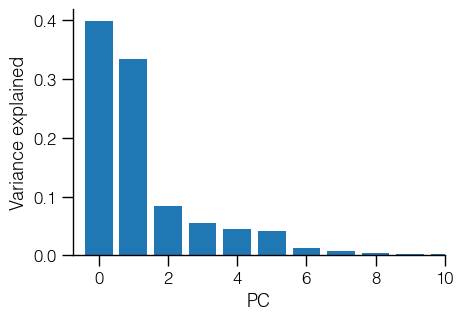

In [31]:
scale = 0.8
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

axs.bar(np.arange(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_)
axs.set_xlim(-0.75, 10)
axs.set_ylabel('Variance explained')
axs.set_xlabel('PC')
format_plot(axs)

Axes(0.424432,0.53;0.0528409x0.35)
Axes(0.847159,0.53;0.0528409x0.35)
Axes(0.424432,0.11;0.0528409x0.35)
Axes(0.847159,0.11;0.0528409x0.35)
[<Axes: > <Axes: > <Axes: > <Axes: >]
[<Axes: xlabel='PC 1', ylabel='PC 2'>, <Axes: xlabel='PC 3', ylabel='PC 4'>, <Axes: xlabel='PC 5', ylabel='PC 6'>, <Axes: xlabel='PC 7', ylabel='PC 8'>]


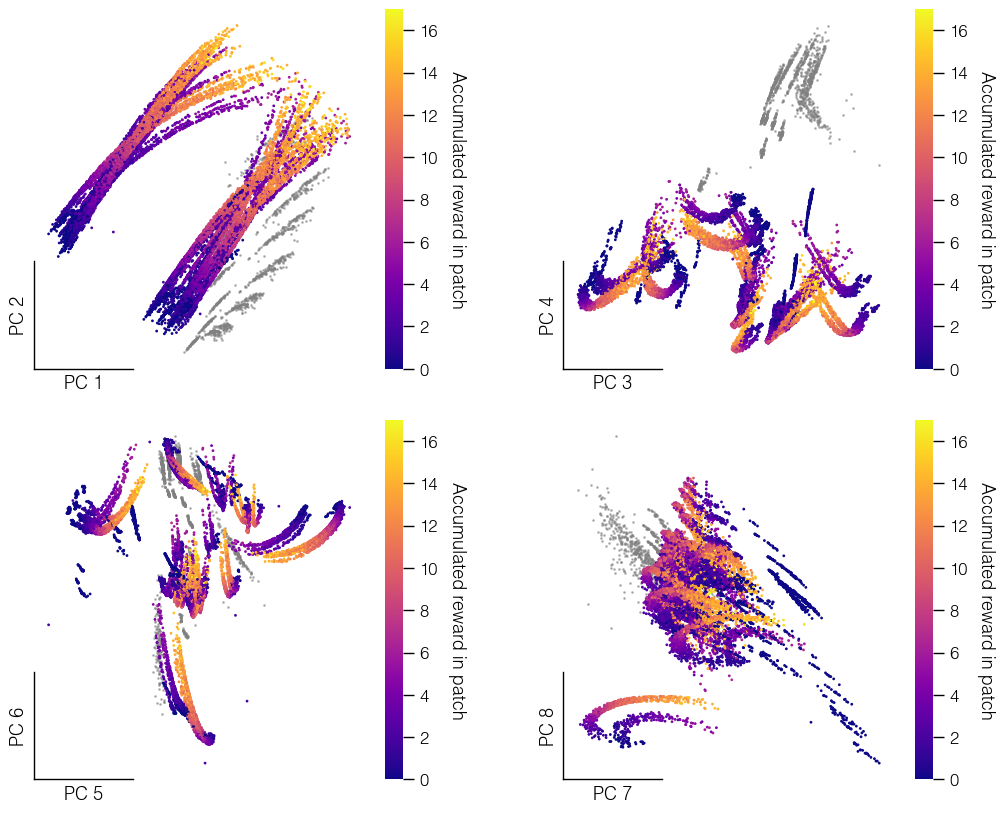

In [33]:
scale = 1.2
fig, axs = plt.subplots(2, 2, figsize=(9 * scale, 7 * scale))

for k in np.arange(0, 8, 2):
    k_x, k_y = int(k/4), int(k/2) % 2
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] <= 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] <= 0],
        s=1,
        c='grey',
        alpha=0.5,
        # vmax=2,
    )
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] > 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] > 0],
        s=1,
        c=session_data['rewards_seen_in_patch'][session_data['agent_in_patch'] > 0],
        cmap='plasma',
        vmin=0,
    )
    cbar_ax = fig.colorbar(cbar)
    format_plot(cbar_ax.ax, rightspine=False, leftspine=False, topspine=False, bottomspine=False)
    cbar_ax.outline.set_visible(False)
    cbar_ax.set_label('Accumulated reward in patch', rotation=270, labelpad=20)
fig.tight_layout()
# axs[0, 0].set_title('Activity colored by rewards seen in patch')
# fig.tight_layout()
format_pc_plot(axs)

Axes(0.424432,0.53;0.0528409x0.35)
Axes(0.847159,0.53;0.0528409x0.35)
Axes(0.424432,0.11;0.0528409x0.35)
Axes(0.847159,0.11;0.0528409x0.35)
[<Axes: > <Axes: > <Axes: > <Axes: >]
[<Axes: xlabel='PC 1', ylabel='PC 2'>, <Axes: xlabel='PC 3', ylabel='PC 4'>, <Axes: xlabel='PC 5', ylabel='PC 6'>, <Axes: xlabel='PC 7', ylabel='PC 8'>]


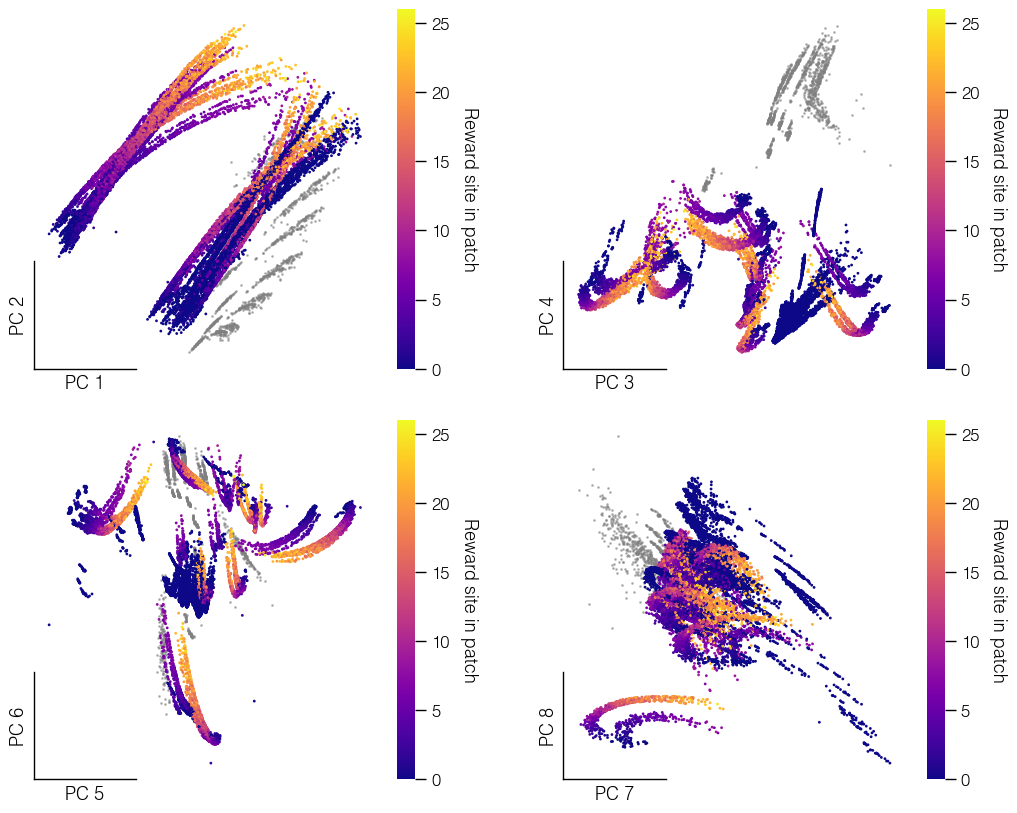

In [34]:
scale = 1.2
fig, axs = plt.subplots(2, 2, figsize=(9 * scale, 7 * scale))

for k in np.arange(0, 8, 2):
    k_x, k_y = int(k/4), int(k/2) % 2
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] <= 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] <= 0],
        s=1,
        c='grey',
        alpha=0.5,
        # vmax=2,
    )
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] > 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] > 0],
        s=1,
        c=session_data['reward_site_idx'][session_data['agent_in_patch'] > 0],
        cmap='plasma',
        vmin=0,
    )
    cbar_ax = fig.colorbar(cbar)
    format_plot(cbar_ax.ax, rightspine=False, leftspine=False, topspine=False, bottomspine=False)
    cbar_ax.outline.set_visible(False)
    cbar_ax.set_label('Reward site in patch', rotation=270, labelpad=20)
# axs[0, 0].set_title('Activity colored by rewards seen in patch')
fig.tight_layout()
format_pc_plot(axs)
# fig.tight_layout()

[<Axes: > <Axes: > <Axes: > <Axes: >]
[<Axes: xlabel='PC 1', ylabel='PC 2'>, <Axes: xlabel='PC 3', ylabel='PC 4'>, <Axes: xlabel='PC 5', ylabel='PC 6'>, <Axes: xlabel='PC 7', ylabel='PC 8'>]


C:\Users\david.bell\AppData\Local\Temp\ipykernel_3744\634952935.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('magma')


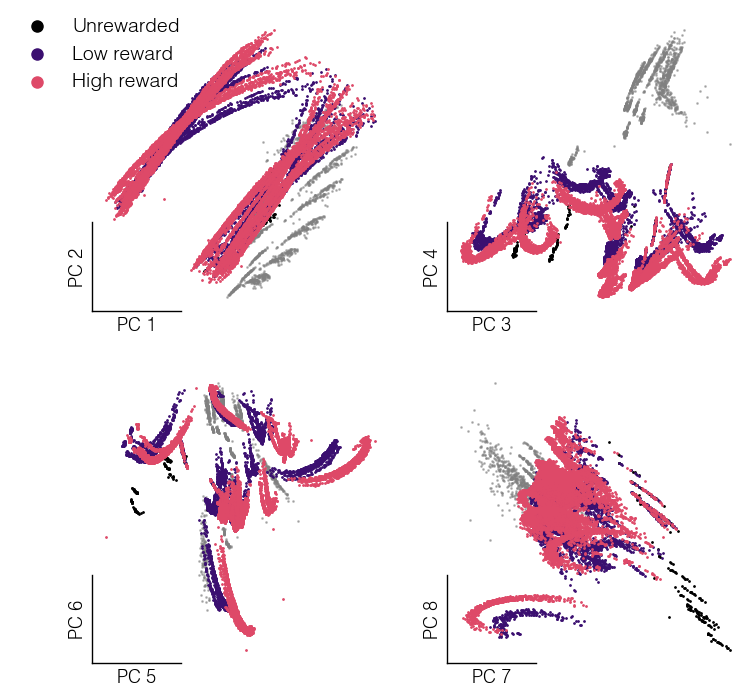

In [35]:
scale = 1.2
fig, axs = plt.subplots(2, 2, figsize=(7 * scale, 7 * scale))

for k in np.arange(0, 8, 2):
    k_x, k_y = int(k/4), int(k/2) % 2
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] <= 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] <= 0],
        s=1,
        c='grey',
        alpha=0.5,
        # vmax=2,
    )

    cmap = mpl.cm.get_cmap('magma')
    colors = ['black', cmap(10/50), cmap(30/50)]

    labels = [
        'Unrewarded',
        'Low reward',
        'High reward',
    ]
    
    for i in range(3):
        mask = logical_and(session_data['agent_in_patch'] > 0, session_data['current_patch_num'] == i)
        if k == 0:
            cbar = axs[k_x, k_y].scatter(
                pc_activities[k, env_idx, :][mask],
                pc_activities[k+1, env_idx, :][mask],
                s=1,
                color=colors[i],
                label=labels[i],
            )
        else:
            cbar = axs[k_x, k_y].scatter(
                pc_activities[k, env_idx, :][mask],
                pc_activities[k+1, env_idx, :][mask],
                s=1,
                color=colors[i],
            )
    # cbar_ax = fig.colorbar(cbar)
    # format_plot(cbar_ax.ax, rightspine=False, leftspine=False, topspine=False, bottomspine=False)
    # cbar_ax.outline.set_visible(False)
# axs[0, 0].set_title('Activity colored by rewards seen in patch')
legend = fig.legend(markerscale=8, bbox_to_anchor=(0.25, .9), fontsize=14, frameon=False)
# fig.tight_layout()
format_pc_plot(axs)

Axes(0.424432,0.53;0.0528409x0.35)
Axes(0.847159,0.53;0.0528409x0.35)
Axes(0.424432,0.11;0.0528409x0.35)
Axes(0.847159,0.11;0.0528409x0.35)
[<Axes: > <Axes: > <Axes: > <Axes: >]
[<Axes: xlabel='PC 1', ylabel='PC 2'>, <Axes: xlabel='PC 3', ylabel='PC 4'>, <Axes: xlabel='PC 5', ylabel='PC 6'>, <Axes: xlabel='PC 7', ylabel='PC 8'>]


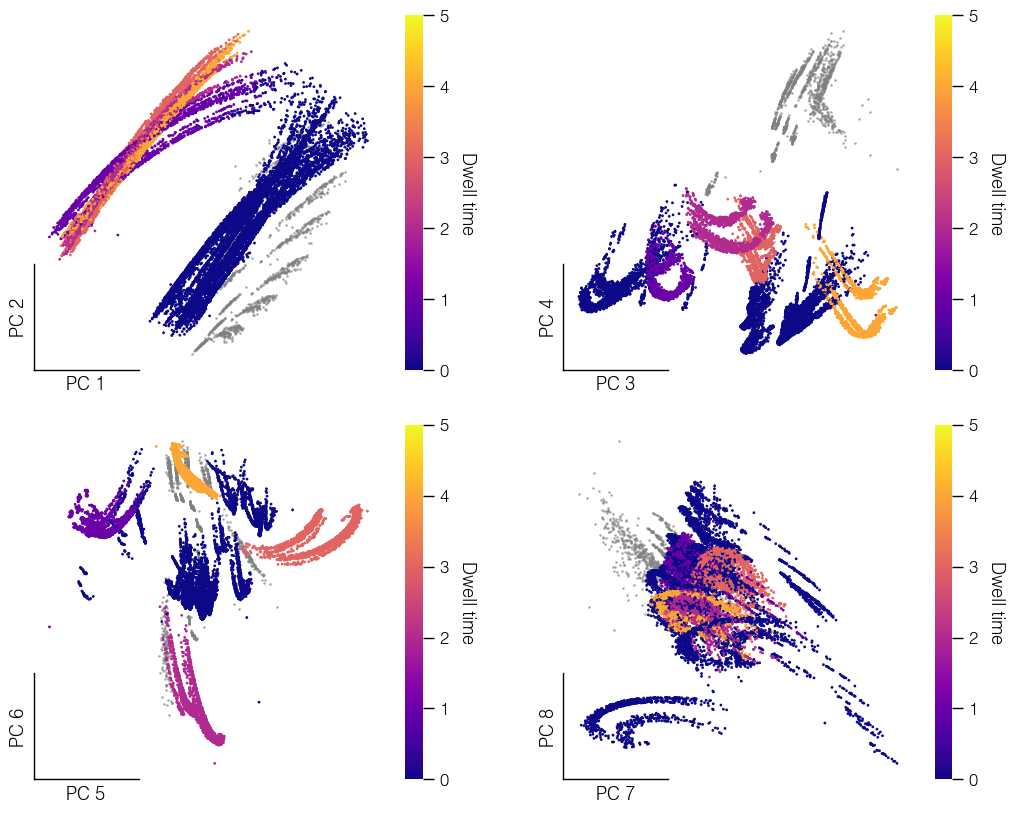

In [36]:
scale = 1.2
fig, axs = plt.subplots(2, 2, figsize=(9 * scale, 7 * scale))

for k in np.arange(0, 8, 2):
    k_x, k_y = int(k/4), int(k/2) % 2
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] <= 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] <= 0],
        s=1,
        c='grey',
        alpha=0.5,
        # vmax=2,
    )
    cbar = axs[k_x, k_y].scatter(
        pc_activities[k, env_idx, :][session_data['agent_in_patch'] > 0],
        pc_activities[k+1, env_idx, :][session_data['agent_in_patch'] > 0],
        s=1,
        c=session_data['dwell_time'][session_data['agent_in_patch'] > 0],
        cmap='plasma',
        vmin=0,
    )
    cbar_ax = fig.colorbar(cbar)
    format_plot(cbar_ax.ax, rightspine=False, leftspine=False, topspine=False, bottomspine=False)
    cbar_ax.outline.set_visible(False)
    cbar_ax.set_label('Dwell time', rotation=270, labelpad=20)
# axs[0, 0].set_title('Activity colored by rewards seen in patch')
fig.tight_layout()
format_pc_plot(axs)

In [54]:
def extract_rep_direction(hidden_activities, all_session_data, var, in_patch=False):
    rep_directions = []
    for env_i in range(len(all_session_data)):
        session_data = all_session_data[env_i]
        min_val, max_val = session_data['rewards_seen_in_patch'].min(), session_data[var].max()
        in_patch_mask = session_data['agent_in_patch'] == 1
        min_mask = logical_and(in_patch_mask, session_data[var] == min_val)
        max_mask = logical_and(in_patch_mask, session_data[var] == max_val)
        hidden_env_i_min = hidden_activities[:, env_i, min_mask].mean(axis=-1)
        hidden_env_i_max = hidden_activities[:, env_i, max_mask].mean(axis=-1)
        rep_directions.append(hidden_env_i_max - hidden_env_i_min)
    return np.array(rep_directions).mean(axis=0)
        


In [62]:
rep_direction = extract_rep_direction(hidden, all_session_data, 'rewards_seen_in_patch')
write_path = os.path.join(dir_path, 'stored_pcs_and_weights')
make_path_if_not_exists(write_path)
compressed_write(rep_direction, os.path.join(write_path, 'rewards_seen_in_patch.pkl').replace('\\','/'))